<h1>HW3</h1>

# Question 1
### (Bayes Theorem) Read the following example and complete the exercises 

Trolls Under the Bridge
1. Trolls(T) are bad
2. Gnomes(G) are benign
3. Every bridge has 5 creatures under it

Below are the probabilities of what creatures live under a bridge:
1. TTGGG: 20% (E1)
2. TGGGG: 20% (E2)
3. GGGGG: 60% (E3)

A knight is approaching a bridge and he wants to know his chance of crossing the bridge safely.

### 1.1 

#### What is the chance of the knight crossing the bridge safely?


In [ ]:
E1 = 20
E2 = 20
E3 = 60 

#The knight has a 60% chance of crossing the bridge safely

### 1.2

#### Before crossing a bridge, a knight captures a troll. “I now have an 80% chance of crossing safely,” he reasons, “since only the case 20% had TTGGG (E1) now have TGGG is still a threat.”

#### Do you agree with him? Why?

No, I do not agree with him. Since he captured a troll that means he is either at E1 or E2, and could not be at E3. He actually now has a 1/3 chance of crossing the bridge safely, if he captured a troll from E1 there is still one troll left so it is still not safe to cross that route, however if he captured a troll from E2, he would pass safely since there is only one on that route. In this case, since there are 3 trolls overall and he only has a chance of being safe if he captured the one troll from E2, he has a 1/3 chance of crossing safely. 

### 1.3

#### Now he wants to use Bayes' theorem to calculate his chance of crossing safely given a troll captured 

\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)} \\
P(A|B): Posteior \\
P(B|A): Likelihood \\
P(A): Prior \\
P(B): Marginal Probability \\
\end{equation*}

Given the three events, E1, E2, and E3, which two of the three events does the knight need to consider after a troll was captured?

After a troll is captured, the knight must consider Event 1 and Event 2, since Event 3 has no trolls to begin with.

### 1.4

#### Use Bayes' theorem to calculate the probability of the two events in 1.3 (separately) given the troll was captured. 

Probability of one event given a troll captured: 

In [87]:
#Probability of crossing E1
#P(E1|T) = (P(T|E1)*P(E1))/P(T)
PE1T = ((2/5)*(1/5))/(((2/5)*(1/5))+((1/5)*(1/5))+(0*(3/5)))

0.6666666666666666

Probability of the other event given a troll captured: 

In [91]:
#Probability of crossing E2:
#P(E2|T) = (P(T|E2)*P(E2))/(P(T))
#P(E2|T) = ((1/5)*(1/5)/((2/5*1/5)+(1/5*1/5)+(0*3/5))
#Probability of troll is 2/5 for E1, 1/5 for E2, and 0 for E3
#Probability of E1 -> 1/5, of E2 1/5, of E3 3/5
PE2T = ((1/5)*(1/5))/(((2/5)*(1/5))+((1/5)*(1/5))+(0*(3/5)))

0.3333333333333333

### 1.5

#### What is the chance of the knight crossing safely?

In [92]:
#Impossible to cross E1 safely, since there will be a troll left if a troll is captured
PS = PE2T

0.3333333333333333

#### Now looking back to 1.1, the probabilities were changed after assimilating data! 

# Question 2
### (Polynomial Fitting) Read the following example and complete the exercises 

Biological data always comes with errors that influence the intepretation of the data significantly. In this question, we will simulate data and see how noises affect the parameter estimation.

In [162]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random"])

   Resolving package versions...
  No Changes to `C:\Users\elpid\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\elpid\.julia\environments\v1.8\Manifest.toml`


In [217]:
import Distributions as di
import Plots
import Polynomials
import Random

### 2.1

1. Generate the independent variable x ranging from -10 to 10 with an increment of 1
2. Generate the dependent variable y_true using the equation y_true = x^2 + 3x - 2


In [218]:
using Polynomials
using Plots
using Random
using Statistics
x = -10:1:10
collect(x)

21-element Vector{Int64}:
 -10
  -9
  -8
  -7
  -6
  -5
  -4
  -3
  -2
  -1
   0
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10

In [219]:
y_true = x.^2 + 3x .- 2

21-element Vector{Int64}:
  68
  52
  38
  26
  16
   8
   2
  -2
  -4
  -4
  -2
   2
   8
  16
  26
  38
  52
  68
  86
 106
 128

### 2.2

1. Generate the Guassian noises with zero mean and a standard deviation of 10

2. Add the noises to y_true to obtain y_observed


In [220]:
dataerror = 10.0
noise = di.Normal(0, dataerror)
y_observed = y_true+rand(noise, length(x))

21-element Vector{Float64}:
  83.4552229960784
  43.01271816621804
  51.0412231730971
  27.53976435085972
  19.09707663736019
  -2.651234974195331
 -10.866858537401217
  -4.093898875293073
  -6.089920824835171
  11.10208509612016
 -17.318012531477567
   0.17187836135960977
   4.078800103878077
  17.251673359943613
  25.77449475259422
  32.53114216760347
  68.582557958526
  59.59222630476002
  84.25791247945324
 110.05095604082493
 145.72027868147762

### 2.3

#### Fit the data (x, y_observed) with a second order polynomial. 

1. Make a scatter plot of y_observed along x
2. Plot a line of y_true along x on the scatter plot
3. Plot a line of the fitted polynomial along x on the same plot

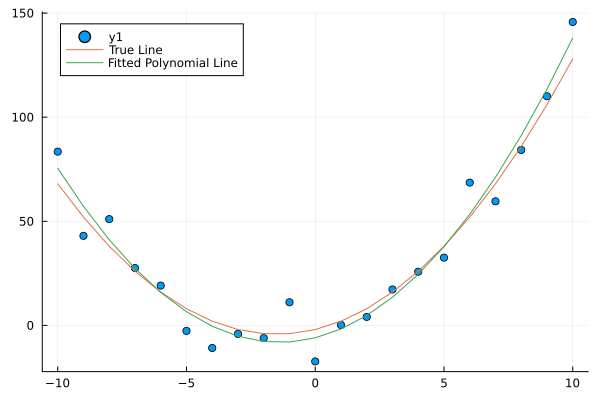

In [221]:
using Polynomials
x = collect(x)

line_fit = fit(x,y_observed,2)
fit_coeff = coeffs(line_fit)
y_fitpol = fit_coeff[1] .+ (fit_coeff[2] .* x) .+ (fit_coeff[3] .* (x.^2))


scatter(x, y_observed)
plot!(x, y_true, label = "True Line")
plot!(x, y_fitpol, label= "Fitted Polynomial Line")

### 2.4

1. Repeat 2.2 and 2.3 with a noise with a standard deviation of 50

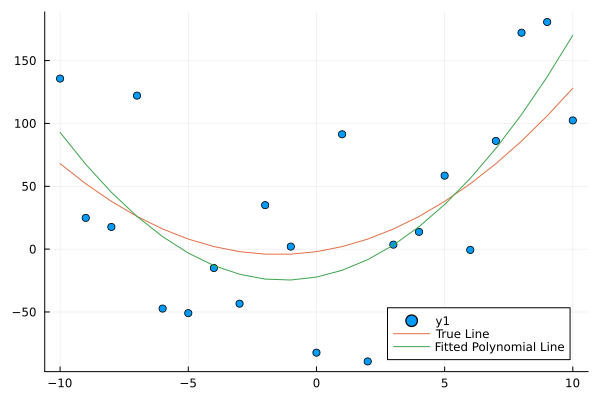

In [222]:
dataerror50 = 50.0
noise50 = di.Normal(0, dataerror50)
y_observed_new = y_true+rand(noise50, length(x))

line_fit_new = fit(x,y_observed_new, 2)
typeof(line_fit)
fit_coeff_new = coeffs(line_fit_new)
y_fitpol = fit_coeff_new[1] .+ (fit_coeff_new[2] .* x) .+ (fit_coeff_new[3] .* (x.^2))

scatter(x, y_observed_new)
plot!(x, y_true, label = "True Line")
plot!(x, y_fitpol, label= "Fitted Polynomial Line")

2. Compare the plot with the plot in 2.3. Is the fit closer to y_true or not, and why?

The fit is not closer to y_true, due to the standard deviation being 5 times larger than before. 

### 2.5

#### Repeat 2.2 and 2.3 with a tenth order polynomial fit


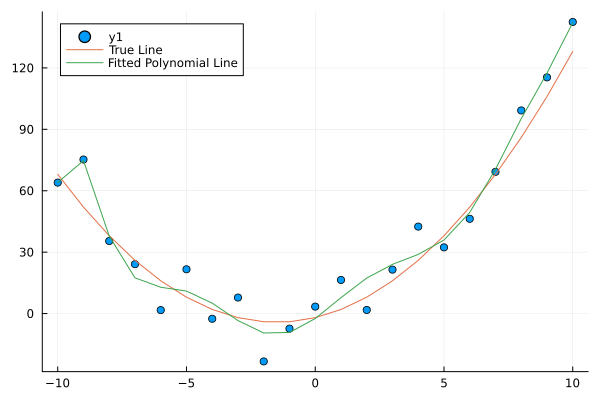

In [223]:
using Polynomials
x = collect(x)

dataerror = 10.0
noise = di.Normal(0, dataerror)
y_observed10 = y_true+rand(noise, length(x))

# Fit the data (x, y_observed) with a 10th-degree polynomial
line_fit10 = fit(x, y_observed10, 10)
p = coeffs(line_fit10)
# Evaluate the polynomial at a set of points

y_fitpol = p[1] .+ (p[2] .* x.^1) + (p[3] .* (x.^2)) + (p[4] .* (x.^3)) + (p[5] .* (x.^4)) + (p[6] .* (x.^5)) + (p[7] .* (x.^6)) + (p[8] .* (x.^7)) + (p[9] .* (x.^8)) + (p[10] .* (x.^9)) + (p[11] .* (x.^10))

scatter(x, y_observed10)
plot!(x, y_true, label = "True Line")
plot!(x, y_fitpol, label= "Fitted Polynomial Line")

### 2.6

1. Create a new independent parameter x_fit ranging from -11 to 11 with an increment of 0.1
2. Plot the same three plots as in 2.3 again but apply the tenth order polynomial to x_fit instead of x


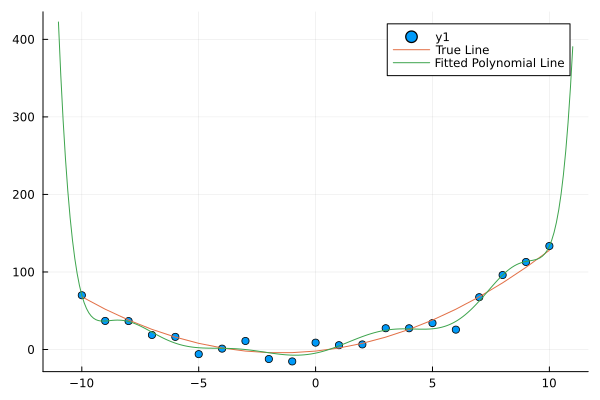

In [228]:
x = -10:1:10
x = collect(x)
x_fit = -11:0.1:11
x_fit=collect(x_fit)
y_true = x.^2 + 3x .- 2


noise10 = di.Normal(0, 10)
y_observed_fit = y_true+rand(noise10, length(x))

line_fit_fit10 = fit(x, y_observed_fit, 10)
p10 = coeffs(line_fit_fit10)

y_fitpol_fit = p10[1] .+ (p10[2] .* (x_fit.^1)) + (p10[3] .* (x_fit.^2)) + (p10[4] .* (x_fit.^3)) + (p10[5] .* (x_fit.^4)) + (p10[6] .* (x_fit.^5)) + (p10[7] .* (x_fit.^6)) + (p10[8] .* (x_fit.^7)) + (p10[9] .* (x_fit.^8)) + (p10[10] .* (x_fit.^9)) + (p10[11] .* (x_fit.^10))

scatter(x, y_observed_fit)
plot!(x, y_true, label = "True Line")
plot!(x_fit, y_fitpol_fit, label= "Fitted Polynomial Line")

3. What do you observe in the plot? What is this phenomenon called?

This is an overfitted graph, it almost completely traces the data points.